In [ ]:

from keras import backend as K
from keras.engine.topology import Layer
from keras.initializers import RandomUniform, Initializer, Constant
import numpy as np


class InitCentersRandom(Initializer):
    """ Initializer for initialization of centers of RBF network
        as random samples from the given data set.
    # Arguments
        X: matrix, dataset to choose the centers from (random rows
          are taken as centers)
    """

    def __init__(self, X):
        self.X = X

    def __call__(self, shape, dtype=None):
        assert shape[1] == self.X.shape[1]
        idx = np.random.randint(self.X.shape[0], size=shape[0])
        return self.X[idx, :]


class RBFLayer(Layer):
    """ Layer of Gaussian RBF units.
    # Example
    ```python
        model = Sequential()
        model.add(RBFLayer(10,
                           initializer=InitCentersRandom(X),
                           betas=1.0,
                           input_shape=(1,)))
        model.add(Dense(1))
    ```
    # Arguments
        output_dim: number of hidden units (i.e. number of outputs of the
                    layer)
        initializer: instance of initiliazer to initialize centers
        betas: float, initial value for betas
    """

    def __init__(self, output_dim, initializer=None, betas=1.0, **kwargs):
        self.output_dim = output_dim
        self.init_betas = betas
        if not initializer:
            self.initializer = RandomUniform(0.0, 1.0)
        else:
            self.initializer = initializer
        super(RBFLayer, self).__init__(**kwargs)

    def build(self, input_shape):

        self.centers = self.add_weight(name='centers',
                                       shape=(self.output_dim, input_shape[1]),
                                       initializer=self.initializer,
                                       trainable=True)
        self.betas = self.add_weight(name='betas',
                                     shape=(self.output_dim,),
                                     initializer=Constant(
                                         value=self.init_betas),
                                     # initializer='ones',
                                     trainable=True)

        super(RBFLayer, self).build(input_shape)

    def call(self, x):

        C = K.expand_dims(self.centers)
        H = K.transpose(C-K.transpose(x))
        return K.exp(-self.betas * K.sum(H**2, axis=1))

        # C = self.centers[np.newaxis, :, :]
        # X = x[:, np.newaxis, :]

        # diffnorm = K.sum((C-X)**2, axis=-1)
        # ret = K.exp( - self.betas * diffnorm)
        # return ret

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.output_dim)

    def get_config(self):
        # have to define get_config to be able to use model_from_json
        config = {
            'output_dim': self.output_dim
        }
        base_config = super(RBFLayer, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))

In [ ]:
from keras.initializers import Initializer
from sklearn.cluster import KMeans


class InitCentersKMeans(Initializer):
    """ Initializer for initialization of centers of RBF network
        by clustering the given data set.
    # Arguments
        X: matrix, dataset
    """

    def __init__(self, X, max_iter=100):
        self.X = X
        self.max_iter = max_iter

    def __call__(self, shape, dtype=None):
        assert shape[1] == self.X.shape[1]

        n_centers = shape[0]
        km = KMeans(n_clusters=n_centers, max_iter=self.max_iter, verbose=0)
        km.fit(self.X)
        return km.cluster_centers_

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive/My Drive/Colab Notebooks/TP_RN
4.0    25
2.0    17
1.0    10
3.0     8
Name: 0, dtype: int64


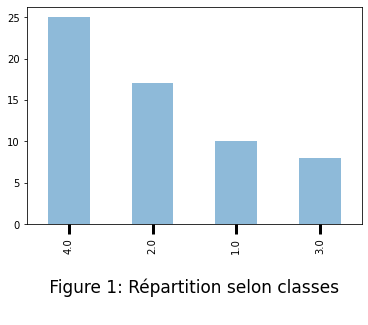

In [ ]:
import numpy as np, pandas as pd
from keras.models import Sequential 
from keras.layers.core import Dense
from keras.layers import Activation
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt





data = pd.read_csv('olive.csv',header=None)
data.head(10) #Return 10 rows of data

datatrans=np.transpose(data)
print(datatrans[0].value_counts())
datatrans[0].value_counts()[:].plot(kind='bar', alpha=0.5)
plt.xlabel('\n Figure 1: Répartition selon classes \n', fontsize='17', horizontalalignment='center')
plt.tick_params(axis='x',  direction='out', length=10, width=3)

plt.show() #2300



In [61]:
#data spliting
X=data.iloc[2:570,:].values
y = data.iloc[0:1,:].values
#data rotation
X=np.transpose(X)
y=np.transpose(y)
print('rotation ')
print(X)
print(y)
#standarizing
from sklearn.preprocessing import MinMaxScaler
X = MinMaxScaler().fit_transform(X)
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y = ohe.fit_transform(y).toarray()
print('resulats de scalling')
print(X,y)

rotation 
[[0.12794961 0.12928222 0.13117417 ... 0.0117163  0.01158336 0.01131473]
 [0.1306754  0.13201661 0.13382406 ... 0.006843   0.00655118 0.00639836]
 [0.12878957 0.13002228 0.13201187 ... 0.01012679 0.00996578 0.00975984]
 ...
 [0.12709775 0.12820942 0.13005264 ... 0.00405713 0.00395372 0.00386319]
 [0.13068094 0.13165094 0.13316545 ... 0.01457566 0.01453478 0.0142012 ]
 [0.13131711 0.13279393 0.13469244 ... 0.00396488 0.00395855 0.00393875]]
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]]
resulats de scalling
[[0.13602305 0.13396615 0.12474061 ... 0.80957734 0.8018326  0.80491908]
 [0.29427508 0.29273545 0.27753058 ... 0.48503382 0.46395659 0.47264817]
 [0.18478887 0.176

In [58]:
from sklearn.model_selection import train_test_split
from keras.optimizers import SGD
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=0)#80% train et 20% test

# from sklearn.preprocessing import StandardScaler
# sc_X = StandardScaler()
# X_train = sc_X.fit_transform(X_train)
# X_test = sc_X.transform(X_test)

# sc_y = StandardScaler()
# y_train = y_train.reshape((len(y_train), 1))
# y_train = sc_y.fit_transform(y_train)
# y_train = y_train.ravel()

model = Sequential()
rbflayer = RBFLayer(34,
                        initializer=InitCentersKMeans(X_train),
                        betas=3.0,
                        input_shape=(568,))
model.add(rbflayer)
model.add(Dense(4))
model.add(Activation('linear'))
model.compile(loss='mean_squared_error',
                  optimizer=RMSprop(), metrics=['accuracy'])
print(model.summary())
history1 = model.fit(X_train, y_train, epochs=1000, batch_size=32)



Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rbf_layer_6 (RBFLayer)       (None, 34)                19346     
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 140       
_________________________________________________________________
activation_6 (Activation)    (None, 4)                 0         
Total params: 19,486
Trainable params: 19,486
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/1000
2/2 [==============================] - 0s 5ms/step - loss: 0.2807 - accuracy: 0.2292
Epoch 2/1000
2/2 [==============================] - 0s 5ms/step - loss: 0.2767 - accuracy: 0.2500
Epoch 3/1000
2/2 [==============================] - 0s 4ms/step - loss: 0.2738 - accuracy: 0.2917
Epoch 4/1000
2/2 [==============================] - 0s 4ms/step - loss: 0.2709 - 

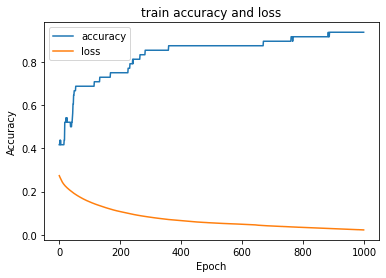

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['loss'])
plt.title('train accuracy and loss')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['accuracy', 'loss'], loc='upper left')
plt.show()

In [ ]:
# # saving to and loading from file
# z_model = f"Z_model.h5"
# print(f"Save model to file {z_model} ... ", end="")
# model.save(z_model)
# print("OK")

Save model to file Z_model.h5 ... OK


In [59]:
#model already saved in file
from tensorflow.keras.models import  load_model
newmodel1= load_model("Zoghbio.h5",
                          custom_objects={'RBFLayer': RBFLayer})
print("OK")

OK


In [60]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = newmodel1.evaluate(X_test, y_test, batch_size=32)
print("test loss:", results[0])
print("test accuracy:",results[1]*100,'%')



Evaluate on test data
1/1 [==============================] - 0s 4ms/step - loss: 0.0393 - accuracy: 0.8333
test loss: 0.039266712963581085
test accuracy: 83.33333134651184 %


In [ ]:
# y_pred = newmodel1.predict(X_test)
# #Converting predictions to label
# pred = list()
# for i in range(len(y_pred)):
#     pred.append(np.argmax(y_pred[i]))
# #Converting one hot encoded test label to label
# test = list()
# for i in range(len(y_test)):
#     test.append(np.argmax(y_test[i]))

# from sklearn.metrics import accuracy_score
# a = accuracy_score(pred,test)
# print('Test Accuracy is:', a*100)

Test Accuracy is: 83.33333333333334
